In [1]:
%matplotlib inline

import logging
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
import sys
import matplotlib
sns.set_style('darkgrid')
sns.set_context('poster', rc={'axes.titlesize': 35, 'axes.labelsize': 30})

Assumes that the following rsync has happened:

`rsync -av orchids-compute:/data1/mloc/local/runs/3hr_forecast.5min_increment/scores.h5 3hr_forecast.5min_increment.scores.h5`
`rsync -av orchids-compute:/data1/urebbapr/MLOC/notebooks/method1.r0.preprocess.test.h5 .`

In [2]:
F_H5_FCAST = '3hr_forecast.5min_increment.scores.h5'
F_H5_TRUTH = 'method1.r0.preprocess.test.h5'

In [3]:
df_ws_fcast_H005 = pd.read_hdf(F_H5_FCAST, '/forecasts/wind_speed/H5')
df_ws_fcast_H060 = pd.read_hdf(F_H5_FCAST, '/forecasts/wind_speed/H60')
df_ws_fcast_H120 = pd.read_hdf(F_H5_FCAST, '/forecasts/wind_speed/H120')
df_ws_fcast_H180 = pd.read_hdf(F_H5_FCAST, '/forecasts/wind_speed/H180')

df_ws_truth = pd.read_hdf(F_H5_TRUTH, '/preprocess/test')['wind_speed']

In [4]:
df_ws_truth.index

DatetimeIndex(['2019-12-31 00:05:00', '2019-12-31 00:10:00',
               '2019-12-31 00:15:00', '2019-12-31 00:20:00',
               '2019-12-31 00:25:00', '2019-12-31 00:30:00',
               '2019-12-31 00:35:00', '2019-12-31 00:40:00',
               '2019-12-31 00:45:00', '2019-12-31 00:50:00',
               ...
               '2020-12-29 23:10:00', '2020-12-29 23:15:00',
               '2020-12-29 23:20:00', '2020-12-29 23:25:00',
               '2020-12-29 23:30:00', '2020-12-29 23:35:00',
               '2020-12-29 23:40:00', '2020-12-29 23:45:00',
               '2020-12-29 23:50:00', '2020-12-29 23:55:00'],
              dtype='datetime64[ns]', name='datetime', length=105119, freq='5T')

In [5]:
df_ws_fcast_H005.index

DatetimeIndex(['2019-12-31 00:05:00', '2019-12-31 00:10:00',
               '2019-12-31 00:15:00', '2019-12-31 00:20:00',
               '2019-12-31 00:25:00', '2019-12-31 00:30:00',
               '2019-12-31 00:35:00', '2019-12-31 00:40:00',
               '2019-12-31 00:45:00', '2019-12-31 00:50:00',
               ...
               '2020-12-28 00:50:00', '2020-12-28 00:55:00',
               '2020-12-28 01:00:00', '2020-12-28 01:05:00',
               '2020-12-28 01:10:00', '2020-12-28 01:15:00',
               '2020-12-28 01:20:00', '2020-12-28 01:25:00',
               '2020-12-28 01:30:00', '2020-12-28 02:50:00'],
              dtype='datetime64[ns]', length=68369, freq=None)

 Here are the original data ranges:
```
    2-13to20-20:
          start: 2020/02/13 00:00
          end  : 2020/02/20 23:59
        8-23to30-20:
          start: 2020/08/23 00:00
          end  : 2020/08/30 23:59
```

In [6]:
FEB_STA = '2020/02/13 00:00'
FEB_END = '2020/02/20 23:59'
AUG_STA = '2020/08/23 00:00'
AUG_END = '2020/08/30 23:59'

Using James' Original Code

In [7]:
def date_range(true, pred, start, end, outfile):

    print(f'Plotting between {start} to {end}')

    true_sub = true.loc[(start <= true.index) & (true.index < end)]
    pred_sub = pred.loc[(start <= pred.index) & (pred.index < end)]

    # Plot
    fig, ax = plt.subplots(figsize=(20,10))
    ax.plot(true_sub, 'g.', label='true')
    ax.plot(pred_sub, 'r.', label='predicted')

    title = f'True vs Predicted between {start} to {end}'

    ax.legend()
    ax.set_ylabel('Wind Speed (m/s)')
    ax.set_xlabel(f'Month-Day Hour (UTC)')
    ax.set_title(title)

    # Save
    plt.tight_layout()
    plt.savefig(outfile)
    plt.show()

Plotting between 2020/02/13 00:00 to 2020/02/20 23:59


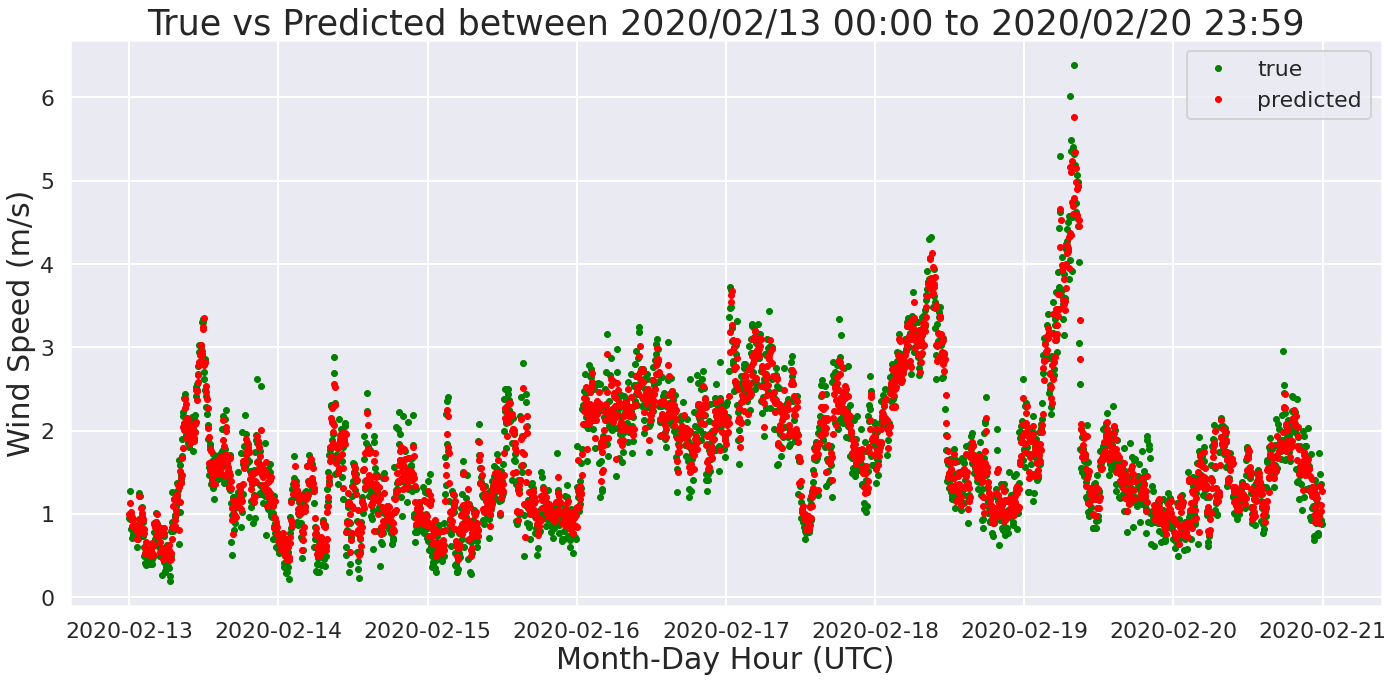

Plotting between 2020/02/13 00:00 to 2020/02/20 23:59


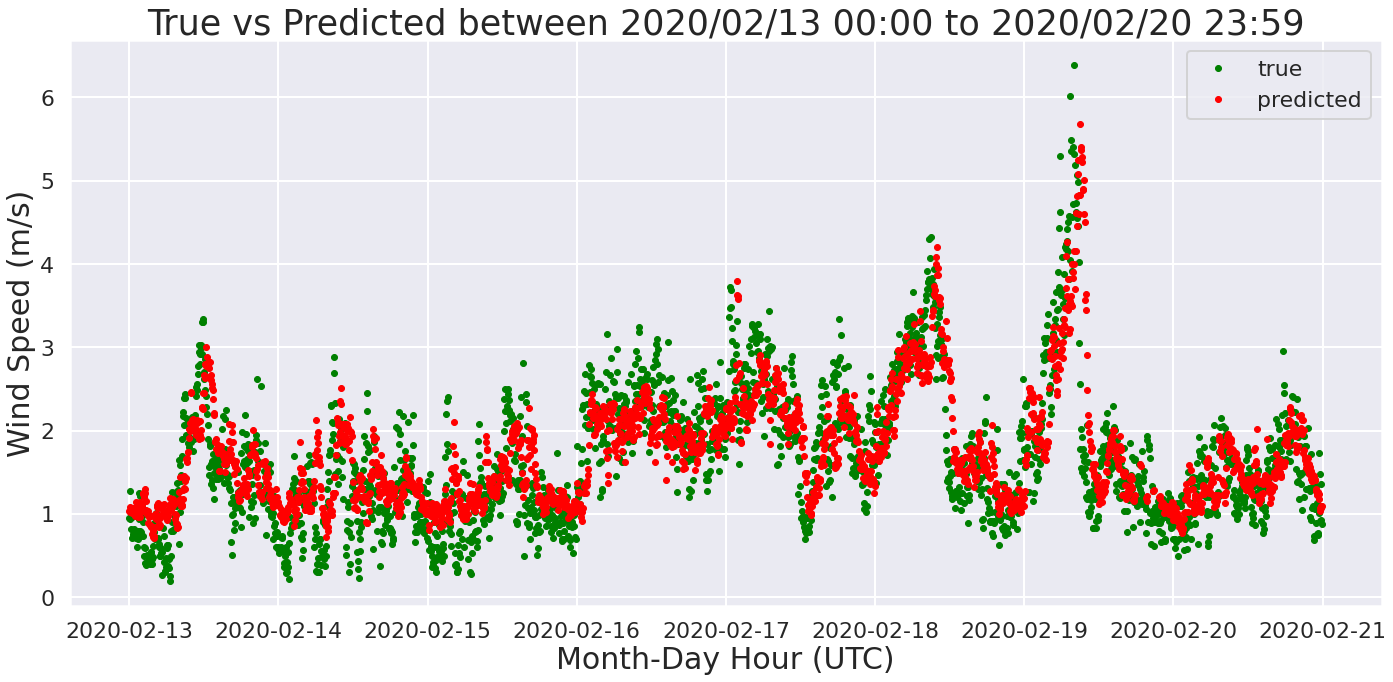

Plotting between 2020/02/13 00:00 to 2020/02/20 23:59


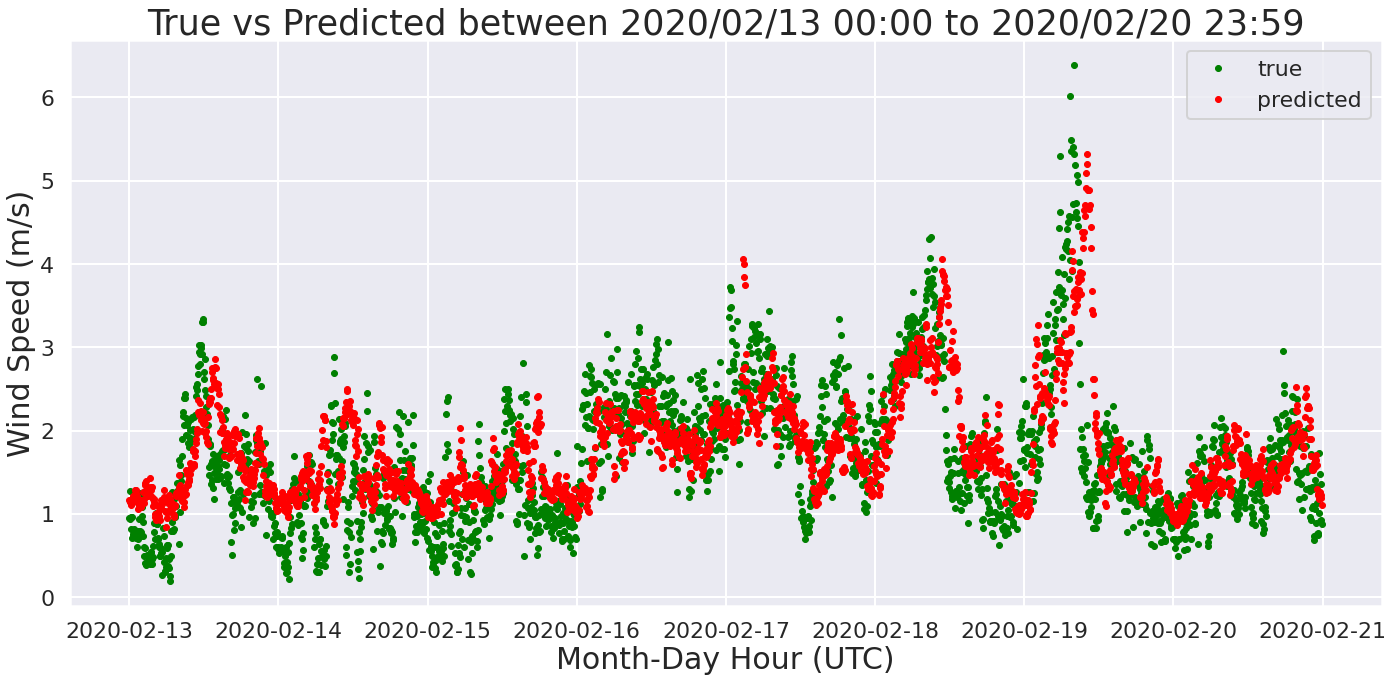

Plotting between 2020/02/13 00:00 to 2020/02/20 23:59


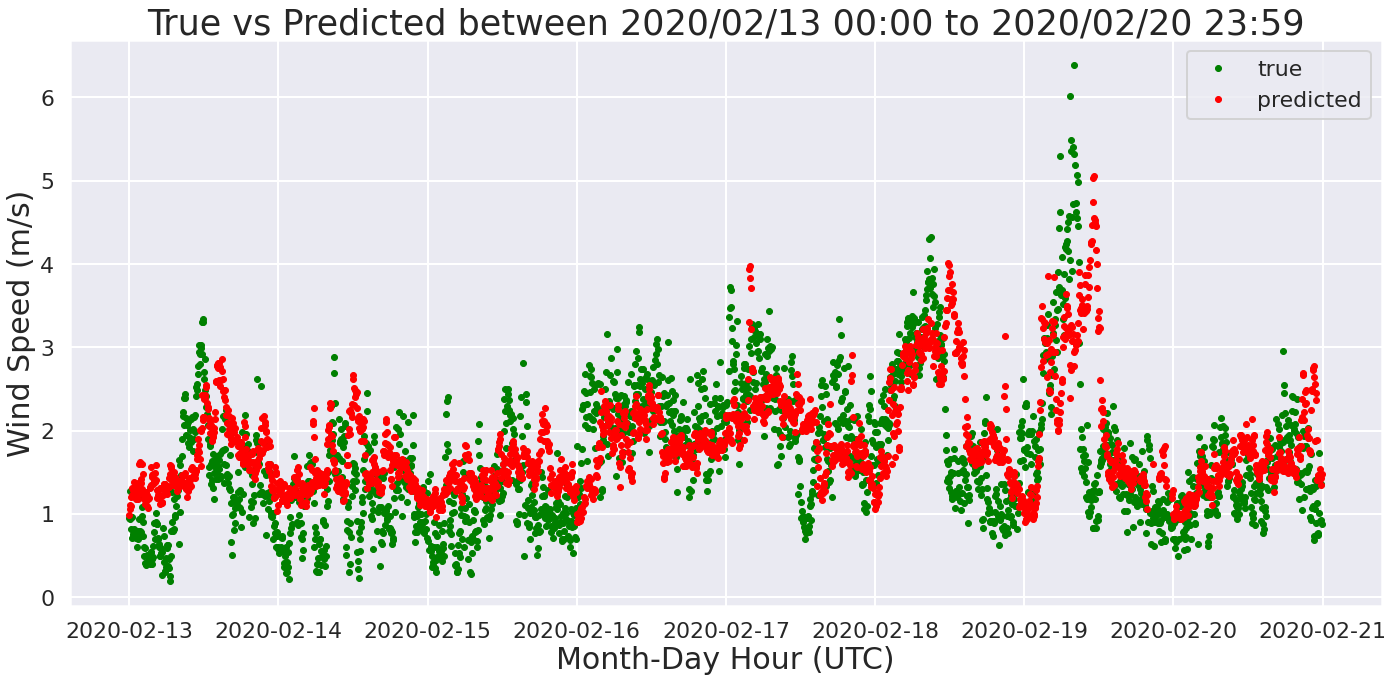

In [8]:
date_range(df_ws_truth, df_ws_fcast_H005, FEB_STA, FEB_END, 'wind_speed.midyearreview.2-13to20-20.H005.png')
date_range(df_ws_truth, df_ws_fcast_H060, FEB_STA, FEB_END, 'wind_speed.midyearreview.2-13to20-20.H060.png')
date_range(df_ws_truth, df_ws_fcast_H120, FEB_STA, FEB_END, 'wind_speed.midyearreview.2-13to20-20.H120.png')
date_range(df_ws_truth, df_ws_fcast_H180, FEB_STA, FEB_END, 'wind_speed.midyearreview.2-13to20-20.H180.png')

Plotting between 2020/08/23 00:00 to 2020/08/30 23:59


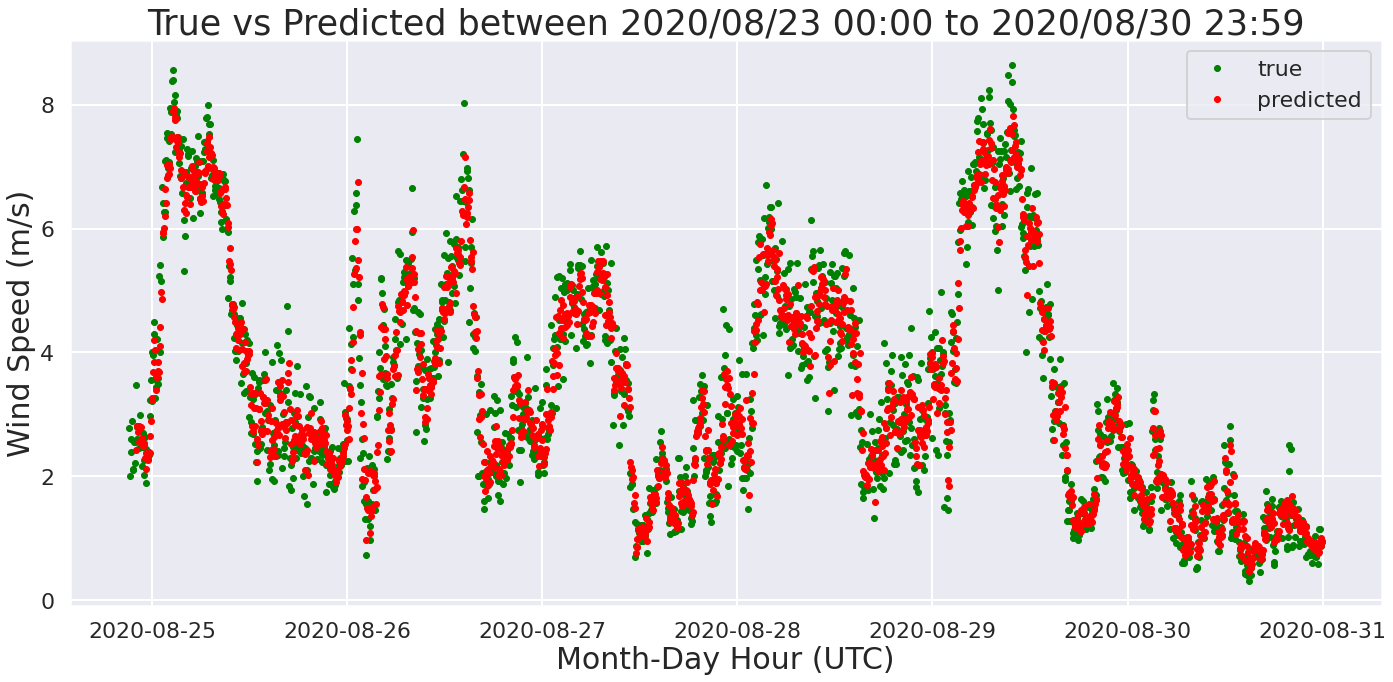

Plotting between 2020/08/23 00:00 to 2020/08/30 23:59


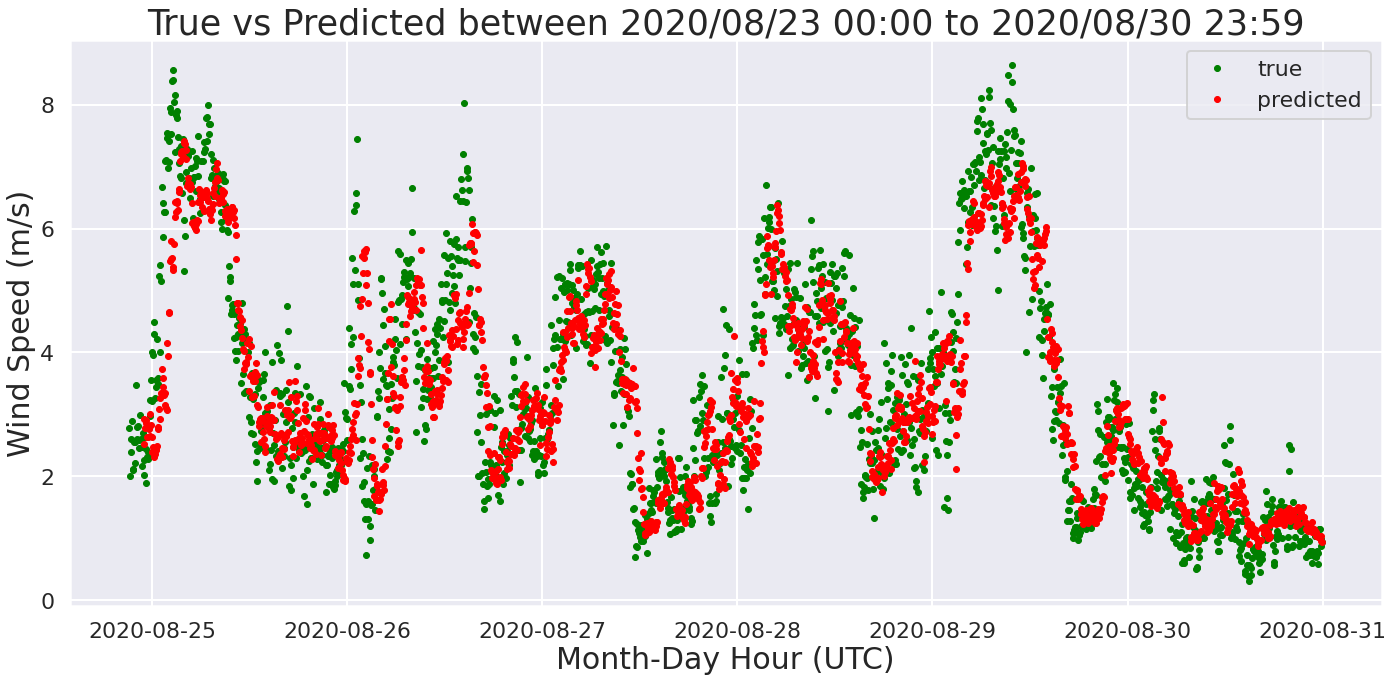

Plotting between 2020/08/23 00:00 to 2020/08/30 23:59


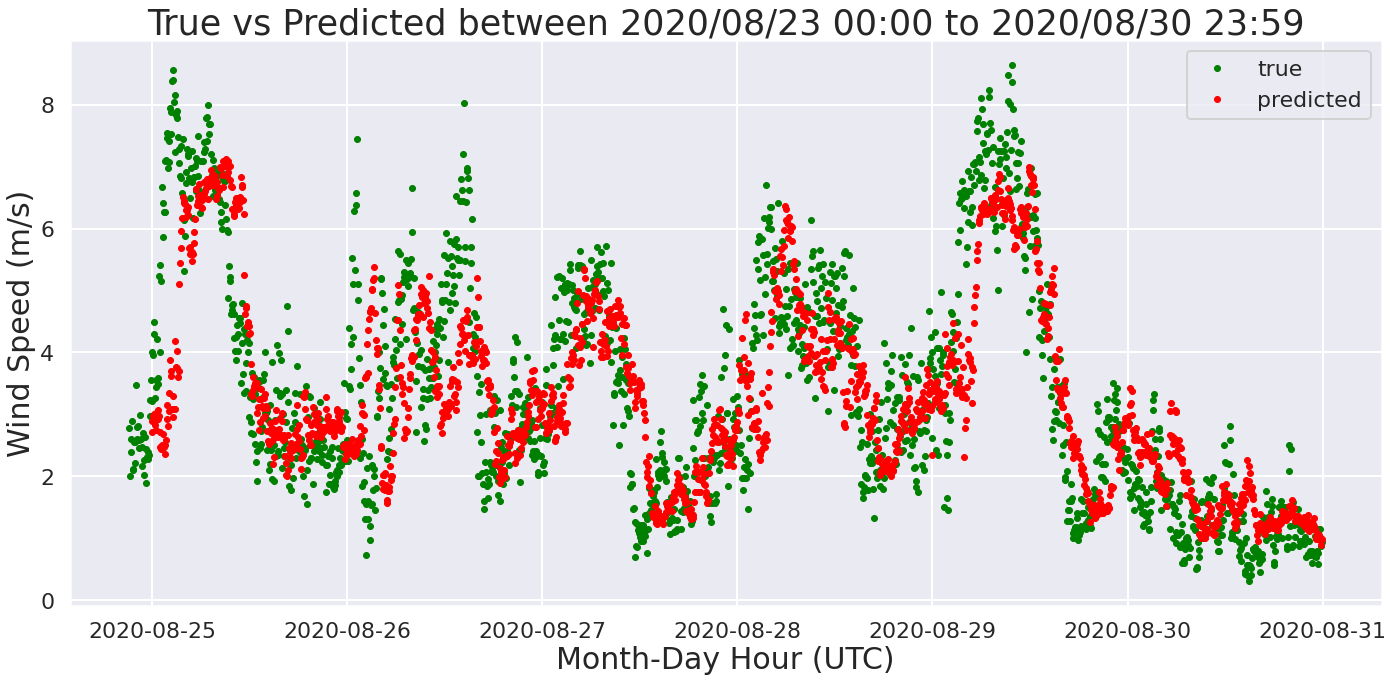

Plotting between 2020/08/23 00:00 to 2020/08/30 23:59


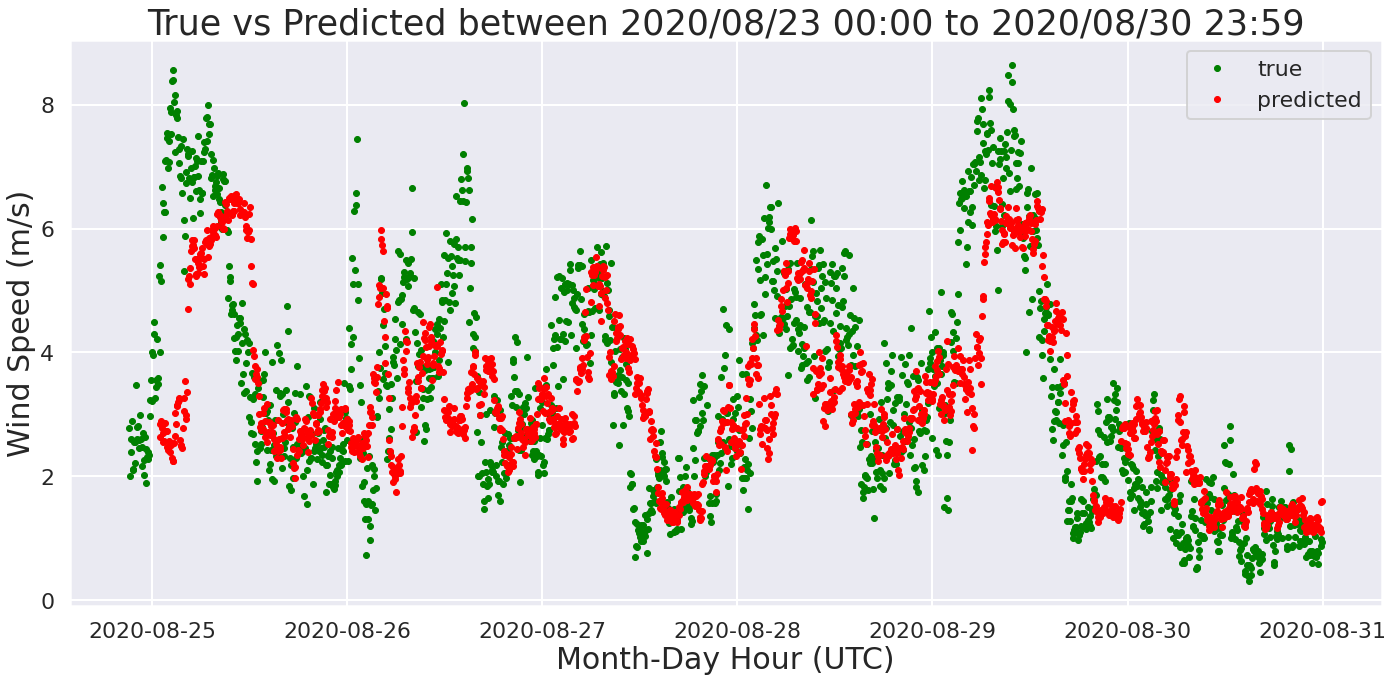

In [9]:
date_range(df_ws_truth, df_ws_fcast_H005, AUG_STA, AUG_END, 'wind_speed.midyearreview.8-23to30-20.H005.png')
date_range(df_ws_truth, df_ws_fcast_H060, AUG_STA, AUG_END, 'wind_speed.midyearreview.8-23to30-20.H060.png')
date_range(df_ws_truth, df_ws_fcast_H120, AUG_STA, AUG_END, 'wind_speed.midyearreview.8-23to30-20.H120.png')
date_range(df_ws_truth, df_ws_fcast_H180, AUG_STA, AUG_END, 'wind_speed.midyearreview.8-23to30-20.H180.png')